# Анализ данных проекта телеграмм бота для подбора конфигураций ПК

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

with open("bot/data/cpu.json", "r", encoding="utf-8") as f:
    cpu = pd.DataFrame(json.load(f))

with open("bot/data/gpu.json", "r", encoding="utf-8") as f:
    gpu = pd.DataFrame(json.load(f))

with open("bot/data/ram.json", "r", encoding="utf-8") as f:
    ram = pd.DataFrame(json.load(f))

with open("bot/data/ssd.json", "r", encoding="utf-8") as f:
    ssd = pd.DataFrame(json.load(f))

with open("bot/data/psu.json", "r", encoding="utf-8") as f:
    psu = pd.DataFrame(json.load(f))

with open("bot/data/case.json", "r", encoding="utf-8") as f:
    case = pd.DataFrame(json.load(f))

with open("bot/data/coolers.json", "r", encoding="utf-8") as f:
    coolers = pd.DataFrame(json.load(f))

with open ("bot/data/motherboard.json", "r", encoding="utf-8") as f:
    motherboard = pd.DataFrame(json.load(f))

# Добавим категорию для каждого датафрейма
cpu["category"] = "CPU"
gpu["category"] = "GPU"
ram["category"] = "RAM"
ssd["category"] = "SSD"
psu["category"] = "PSU"
case["category"] = "Case"
coolers["category"] = "Cooler"
motherboard["category"] = "Motherboard"

# Объединим в один датафрейм
all_components = pd.concat([
    cpu[["name", "price", "category"]],
    gpu[["name", "price", "category"]],
    ram[["name", "price", "category"]],
    ssd[["name", "price", "category"]],
    psu[["name", "price", "category"]],
    case[["name", "price", "category"]],
    coolers[["name", "price", "category"]],
    motherboard[["name", "price", "category"]]
], ignore_index=True)

# Заполним NaN в 'price' нулями
all_components["price"] = all_components["price"].fillna(0)

print("Общее количество компонентов:", len(all_components))
print("Категории:", all_components["category"].unique())

Общее количество компонентов: 253
Категории: ['CPU' 'GPU' 'RAM' 'SSD' 'PSU' 'Case' 'Cooler' 'Motherboard']


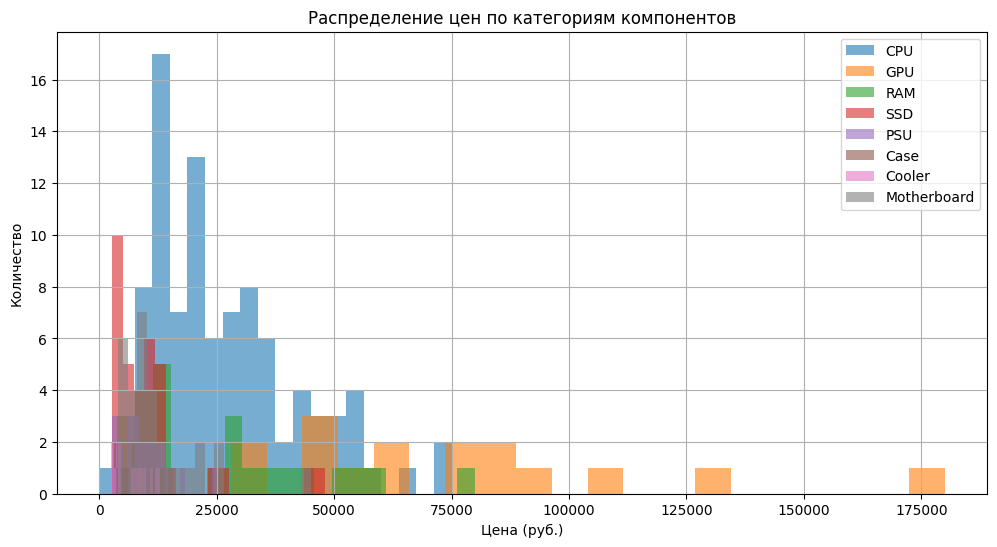

In [24]:
plt.figure(figsize=(12, 6))
for cat in all_components["category"].unique():
    subset = all_components[all_components["category"] == cat]
    plt.hist(subset["price"], bins=20, alpha=0.6, label=cat)

plt.title("Распределение цен по категориям компонентов")
plt.xlabel("Цена (руб.)")
plt.ylabel("Количество")
plt.legend()
plt.grid()
plt.show()

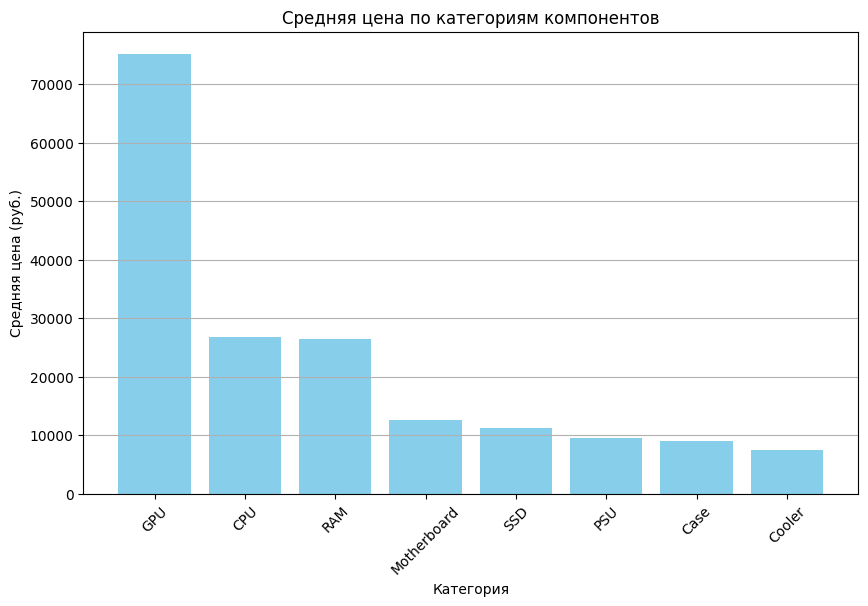

In [23]:
avg_price_by_cat = all_components.groupby("category")["price"].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(avg_price_by_cat.index, avg_price_by_cat.values, color="skyblue")
plt.title("Средняя цена по категориям компонентов")
plt.xlabel("Категория")
plt.ylabel("Средняя цена (руб.)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

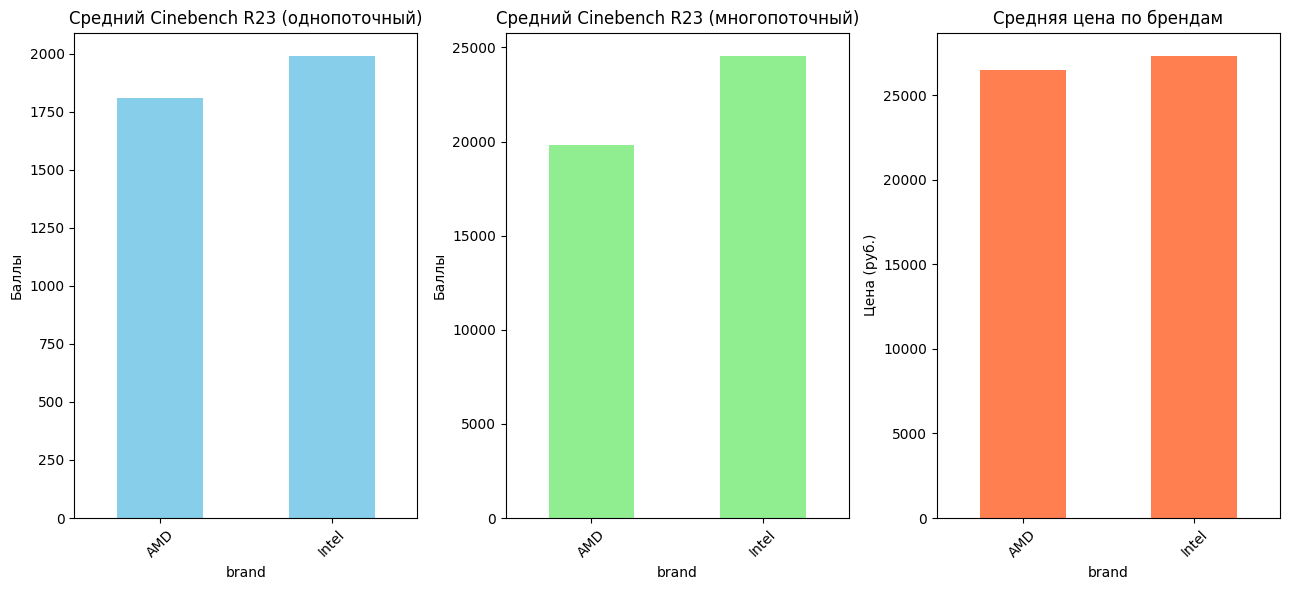

In [22]:
cpu["brand"] = cpu["name"].apply(lambda x: "Intel" if "Intel" in x else "AMD")

avg_cb_single_by_brand = cpu.groupby("brand")["cinebench_r23_single"].mean()
avg_cb_multi_by_brand = cpu.groupby("brand")["cinebench_r23_multi"].mean()
avg_price_by_brand = cpu.groupby("brand")["price"].mean()

plt.figure(figsize=(13, 6))
plt.subplot(1, 3, 1)
avg_cb_single_by_brand.plot(kind="bar", color="skyblue")
plt.title("Средний Cinebench R23 (однопоточный)")
plt.ylabel("Баллы")
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
avg_cb_multi_by_brand.plot(kind="bar", color="lightgreen")
plt.title("Средний Cinebench R23 (многопоточный)")
plt.ylabel("Баллы")
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
avg_price_by_brand.plot(kind="bar", color="coral")
plt.title("Средняя цена по брендам")
plt.ylabel("Цена (руб.)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


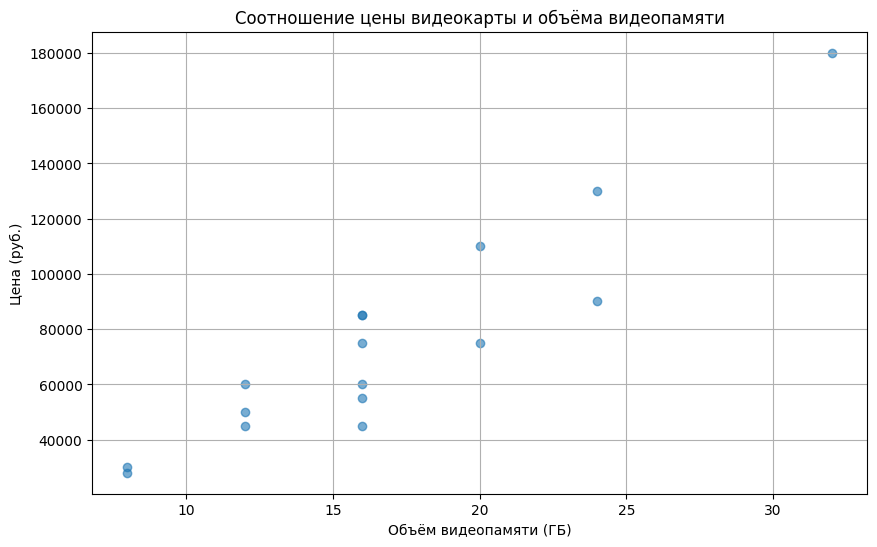

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(gpu["vram"], gpu["price"], alpha=0.6)
plt.title("Соотношение цены видеокарты и объёма видеопамяти")
plt.xlabel("Объём видеопамяти (ГБ)")
plt.ylabel("Цена (руб.)")
plt.grid()
plt.show()

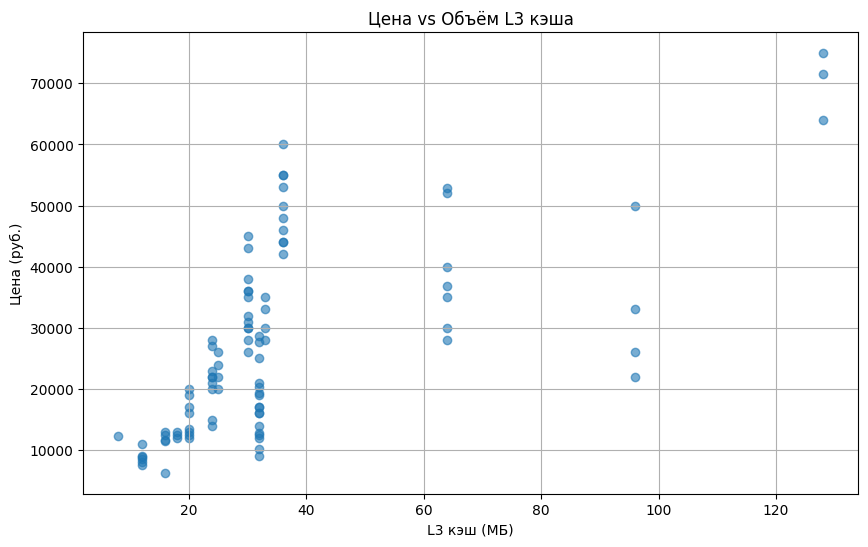

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(cpu["l3_cache"], cpu["price"], alpha=0.6)
plt.title("Цена vs Объём L3 кэша")
plt.xlabel("L3 кэш (МБ)")
plt.ylabel("Цена (руб.)")
plt.grid()
plt.show()

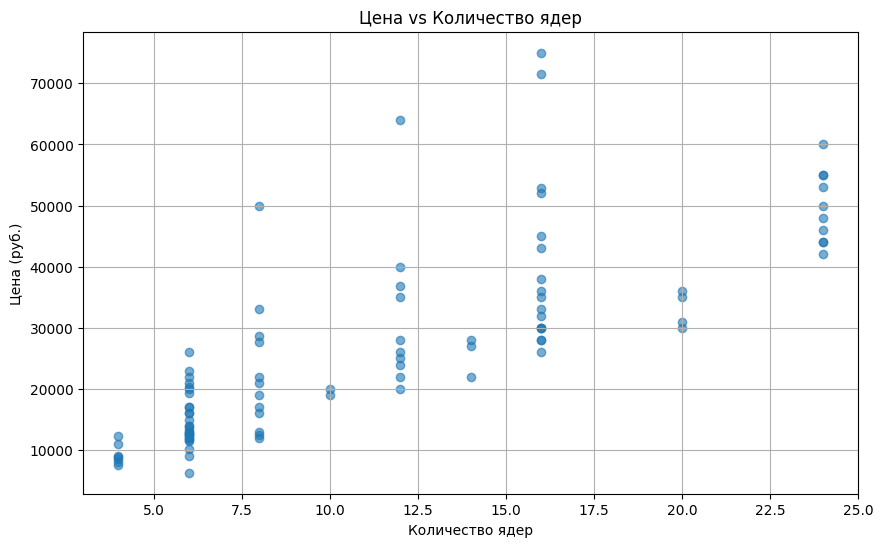

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(cpu["cores"], cpu["price"], alpha=0.6)
plt.title("Цена vs Количество ядер")
plt.xlabel("Количество ядер")
plt.ylabel("Цена (руб.)")
plt.grid()
plt.show()

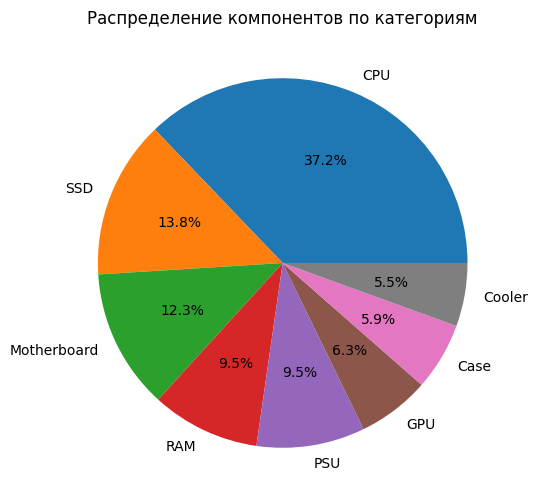

In [17]:
cat_counts = all_components["category"].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(cat_counts.values, labels=cat_counts.index, autopct='%1.1f%%')
plt.title("Распределение компонентов по категориям")
plt.show()

In [31]:
# Вывод
print("\n--- Вывод ---")
print(f"1. Всего компонентов: {len(all_components)}")
print(f"2. Наиболее дорогая категория: {avg_price_by_cat.index[0]} (средняя цена: {avg_price_by_cat.iloc[0]:.0f} руб.)")
print(f"3. Наименее дорогая категория: {avg_price_by_cat.index[-1]} (средняя цена: {avg_price_by_cat.iloc[-1]:.0f} руб.)")
print(f"4. Средняя цена всех компонентов: {all_components['price'].mean():.0f} руб.")
print(f"5. Средний объём L3 кэша: {cpu['l3_cache'].mean():.0f} МБ")
print("6. При анализе CPU было выәвленно что процессоры производителя Intel превосходят по количеству баллов производительности AMD.\n   Но они также являются дороже что может сказаться при подборе комплектующих.")
print("7. Также при анализе обнаружено количество таких параметров как: объём видео памяти, объём кэш памяти cpu, количество ядер cpu\n   - увеличивается совместно с ценой что тоже будет учитываться при сборке.")
print("8. Бот может помочь пользователю выбрать компоненты в рамках бюджета и целей.")
print("9. Анализ показывает, что видеокарты и процессоры — самые дорогие компоненты, что важно учитывать при подборе.")
print("\nАктуальность проекта:")
print("- Сложность подбора совместимых компонентов.")
print("- Рост интереса к сборке ПК.")
print("- Помощь новичкам и экономия времени.")
print("- Учёт производительности, цены и целей (игры, монтаж, офис).")


--- Вывод ---
1. Всего компонентов: 253
2. Наиболее дорогая категория: GPU (средняя цена: 75188 руб.)
3. Наименее дорогая категория: Cooler (средняя цена: 7393 руб.)
4. Средняя цена всех компонентов: 22129 руб.
5. Средний объём L3 кэша: 36 МБ
6. При анализе CPU было выәвленно что процессоры производителя Intel превосходят по количеству баллов производительности AMD.
   Но они также являются дороже что может сказаться при подборе комплектующих.
7. Также при анализе обнаружено количество таких параметров как: объём видео памяти, объём кэш памяти cpu, количество ядер cpu
   - увеличивается совместно с ценой что тоже будет учитываться при сборке.
8. Бот может помочь пользователю выбрать компоненты в рамках бюджета и целей.
9. Анализ показывает, что видеокарты и процессоры — самые дорогие компоненты, что важно учитывать при подборе.

Актуальность проекта:
- Сложность подбора совместимых компонентов.
- Рост интереса к сборке ПК.
- Помощь новичкам и экономия времени.
- Учёт производительност